# 機械学習　第８章　実習問題（回帰）

## 問題文に従って各問題ごとにセルを複数追加してプログラムを実装してください。

## ※ 準備作業
### ▶ 以下を実施してください。

In [87]:
# ドライブのマウント
# ディレクトリの作成
# ディレクトリへの移動
# house_rent.csv のアップロード

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
mkdir data

In [90]:
cd /content/data

/content/data


## ※ matplotlib日本語化のためのライブラリのインストール
### ▶ 以下を実行してください。

In [91]:
!pip install japanize-matplotlib

## データ分析対象データ

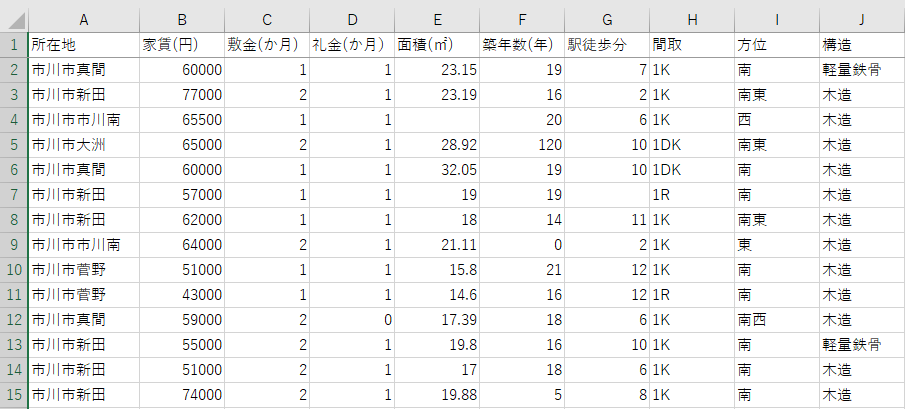

### ■ 正解データ　：　家賃（円）
### ■ 特徴量候補　：　所在地、敷金（か月）、礼金（か月）、面積（㎡）、築年数（年）、駅徒歩、間取、方位、構造

## 問題１　本データのデータ分析において使用する各種ライブラリをインポートしてください。
## また、グラフ表示が同一タブ上に表示されるようにしてください。

In [92]:
import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

%matplotlib inline

# グラフ描画を日本語化
import japanize_matplotlib

from sklearn.preprocessing import StandardScaler

import pickle

## 問題２　CSVファイル house_rent.csv を読み込んでください。ただし、エンコーディングは cp932 を使用してください。

In [93]:
df0 = pd.read_csv('house_rent.csv', encoding='cp932')

# 正解データの列名
t_col = '家賃(円)'

## 問題３　読み込んだCSVファイルの先頭５行と末尾５行を表示してください。

In [94]:
df0.head()

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,1K,西,木造
3,市川市大洲,65000,2,1.0,28.92,120.0,10.0,1DK,南東,木造
4,市川市真間,60000,1,1.0,32.05,19.0,10.0,1DK,南,木造


In [95]:
df0.tail()

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
299,市川市新田,64000,2,1.0,22.01,NaN,5.0,1R,南,木造
300,市川市新田,52000,1,0.0,18.02,25.0,13.0,1K,南東,軽量鉄骨
301,市川市新田,57000,1,1.0,21.70,20.0,10.0,1K,南,木造
302,市川市真間,60000,1,1.0,20.37,13.0,14.0,1K,西,鉄骨造
303,市川市新田,72000,2,1.0,20.70,0.0,2.0,1K,東,鉄骨造


## 問題４　質的データの列をすべて挙げてください。つぎに、それらの列にデータが何種類あるかを調べて表示してください。

In [96]:
categorical_data_cols = ['所在地', '間取', '方位', '構造']
for col in categorical_data_cols:
  print(df0[col].value_counts())
  print()

市川市新田     104
市川市市川南     74
市川市真間      42
市川市大洲      30
市川市市川      26
市川市菅野      20
市川市須和田      3
市川市平田       3
市川市大町       1
市川市大和田      1
Name: 所在地, dtype: int64

1K     229
1R      44
1DK     31
Name: 間取, dtype: int64

南     167
南東     48
東      30
西      26
南西     26
北東      4
北       3
Name: 方位, dtype: int64

木造      249
軽量鉄骨     44
鉄骨造      10
Name: 構造, dtype: int64



## 問題５　質的データをすべてダミー化してデータ分析させるデータフレームを作成して下さい。次に、作成したデータフレームの先頭５行を表示してください。

In [97]:
df_dummy = df0
for col in categorical_data_cols:
  df_dummy = pd.concat([df_dummy, pd.get_dummies(df0[col], drop_first=False)], axis=1)
df_dummy = df_dummy.drop(categorical_data_cols, axis=1)

df_dummy.head()

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,市川市大和田,市川市大洲,市川市大町,市川市市川,市川市市川南,市川市平田,市川市新田,市川市真間,市川市菅野,市川市須和田,1DK,1K,1R,北,北東,南,南東,南西,東,西,木造,軽量鉄骨,鉄骨造
0,60000,1,1.0,23.15,19.0,7.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,77000,2,1.0,23.19,16.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,65500,1,1.0,NaN,20.0,6.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3,65000,2,1.0,28.92,120.0,10.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,60000,1,1.0,32.05,19.0,10.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


## 問題６　問題５で作成したデータフレームにおいて、訓練データ、検証データ、テストデータに分割してください。
### ただし、訓練データとテストデータの比率は８：２、乱数シードは０とします。

In [98]:
train_val, test = train_test_split(df_dummy, test_size = 0.2, random_state = 0)

## 問題７　訓練データにおいて、欠損値を確認して表示し、平均値で穴埋めしてください。欠損値処理した訓練データの先頭５行を表示してください。

In [99]:
train_val.isnull().sum()

家賃(円)     0
敷金(か月)    0
礼金(か月）    0
面積(㎡)     1
築年数(年)    1
駅徒歩分      1
市川市大和田    0
市川市大洲     0
市川市大町     0
市川市市川     0
市川市市川南    0
市川市平田     0
市川市新田     0
市川市真間     0
市川市菅野     0
市川市須和田    0
1DK       0
1K        0
1R        0
北         0
北東        0
南         0
南東        0
南西        0
東         0
西         0
木造        0
軽量鉄骨      0
鉄骨造       0
dtype: int64

In [100]:
train_val = train_val.fillna(train_val.mean())
train_val.head()

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,市川市大和田,市川市大洲,市川市大町,市川市市川,市川市市川南,市川市平田,市川市新田,市川市真間,市川市菅野,市川市須和田,1DK,1K,1R,北,北東,南,南東,南西,東,西,木造,軽量鉄骨,鉄骨造
176,69000,2,1.0,19.87,1.0,2.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
26,70000,2,2.0,31.53,28.0,8.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
74,65000,2,1.0,28.92,12.0,10.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
101,51000,1,1.0,20.50,20.0,2.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
154,72000,2,1.0,20.70,0.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


## 問題８　外れ値処理をしてください。
### ただし、処理過程を説明できるようにセルを構成してください。

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


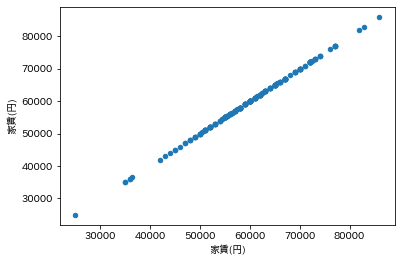

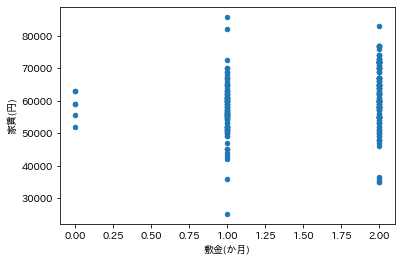

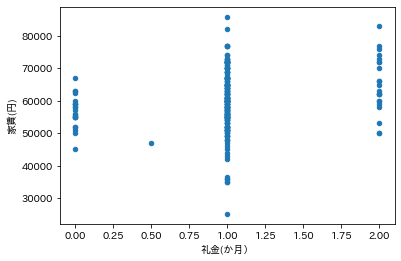

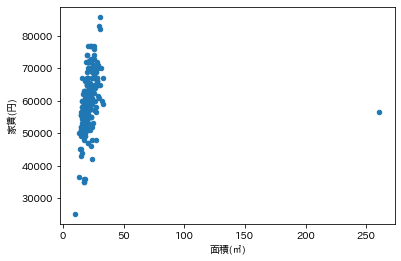

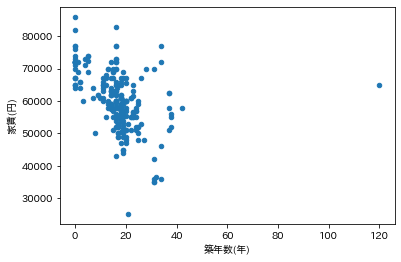

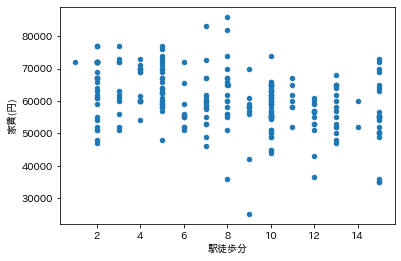

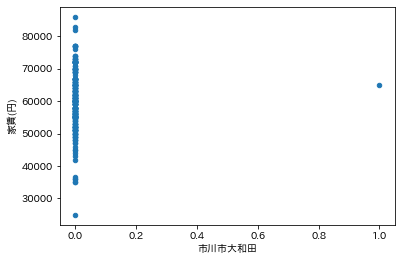

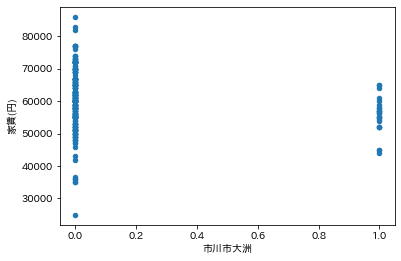

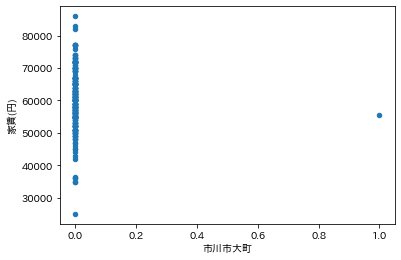

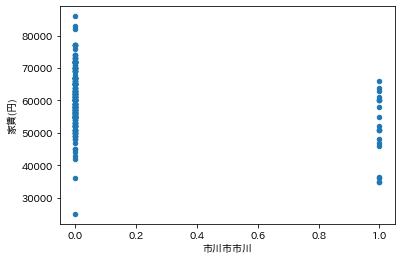

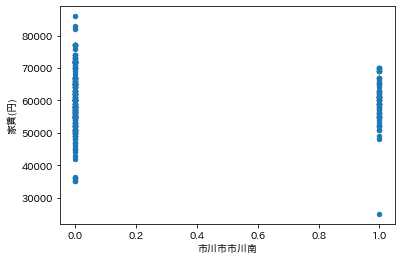

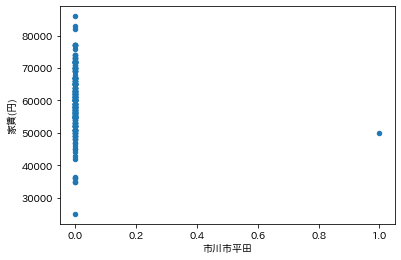

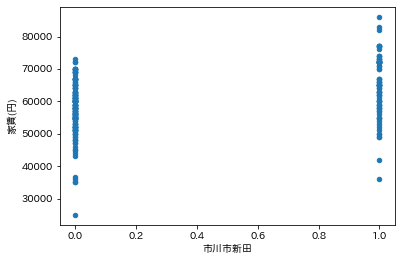

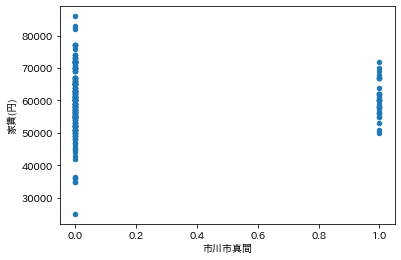

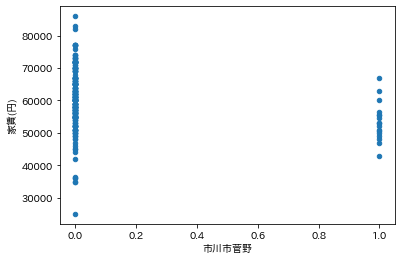

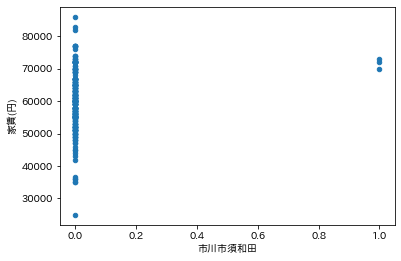

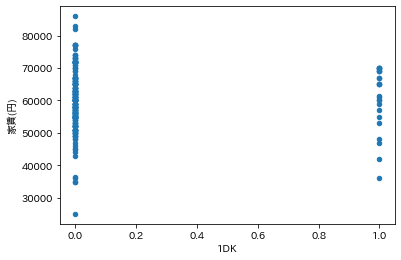

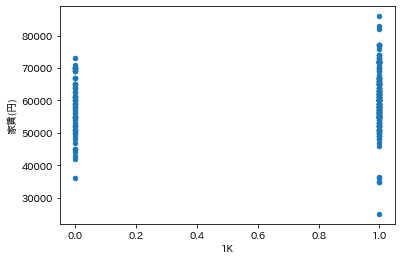

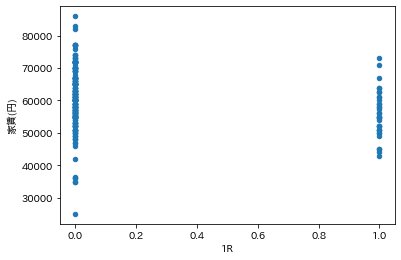

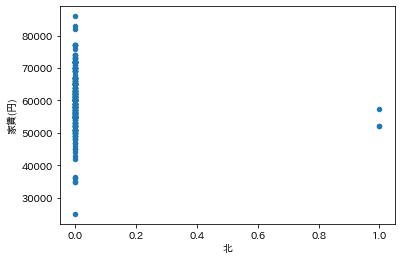

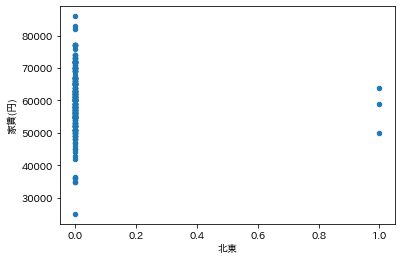

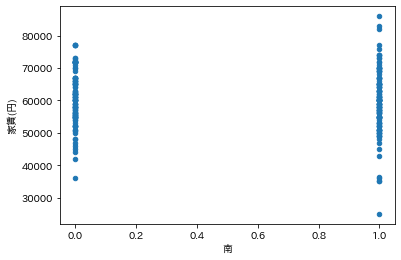

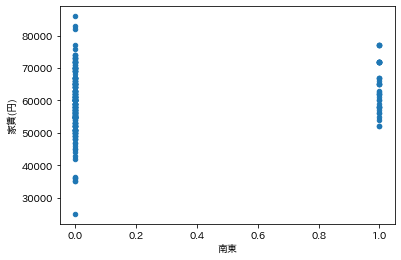

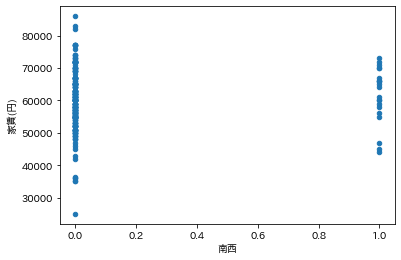

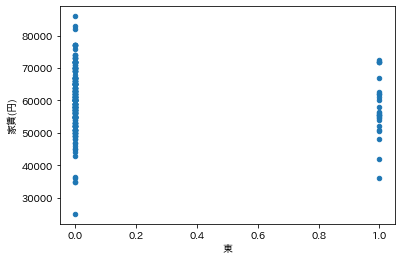

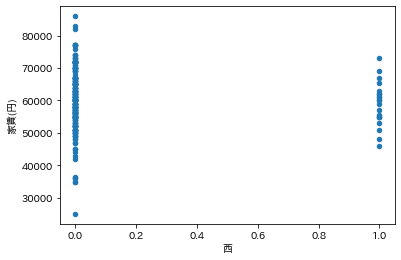

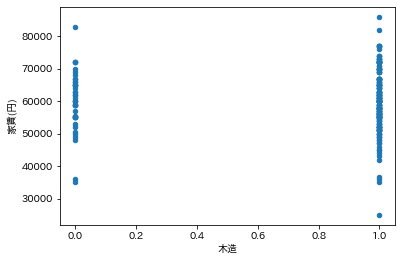

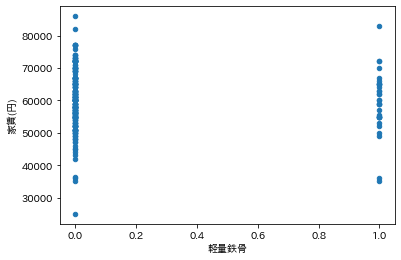

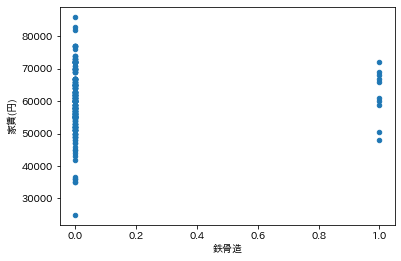

In [101]:
colname = train_val.columns
for name in colname:
  train_val.plot(kind='scatter', x=name, y=t_col)

In [102]:
out_line1 = train_val[(train_val['家賃(円)']<100000) & (50<train_val['面積(㎡)'])].index
out_line2 = train_val[(train_val['家賃(円)']<100000) & (60<train_val['築年数(年)'])].index
out_line3 = train_val[(train_val['家賃(円)']<30000) & (train_val['築年数(年)']<25)].index
out_line4 = train_val[(train_val['家賃(円)']<30000) & (0<train_val['市川市市川南'])].index
print(out_line1, out_line2, out_line3, out_line4)

Int64Index([95], dtype='int64') Int64Index([3], dtype='int64') Int64Index([224], dtype='int64') Int64Index([224], dtype='int64')


In [103]:
train_val = train_val.drop([out_line1[0], out_line2[0], out_line3[0]], axis=0)

## 問題９　外れ値処理の結果を表示してください。

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


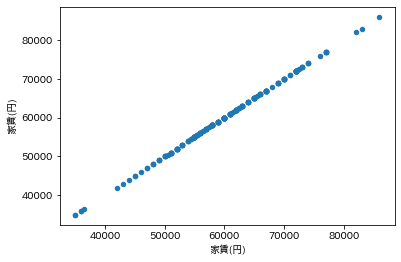

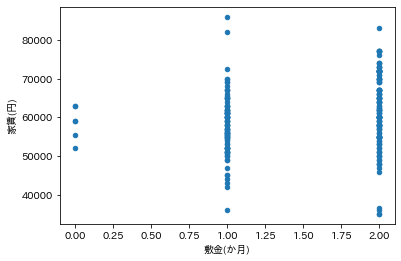

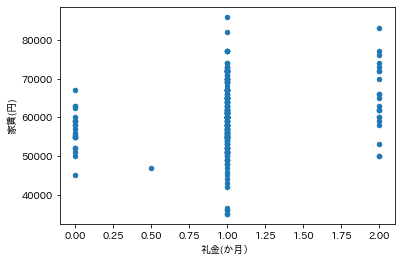

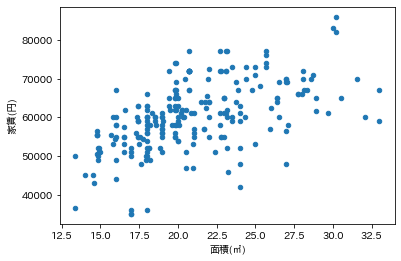

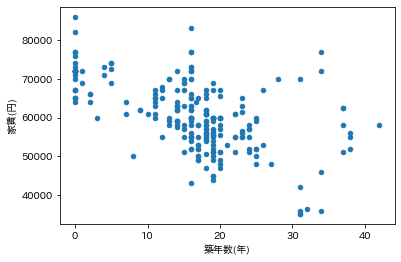

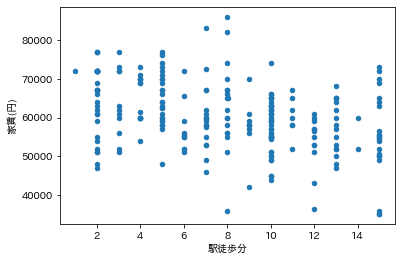

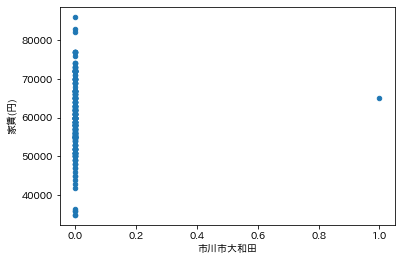

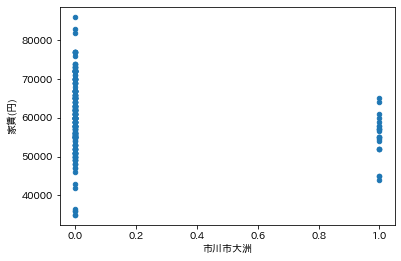

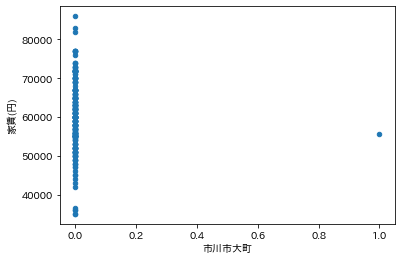

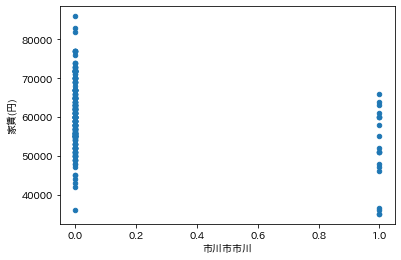

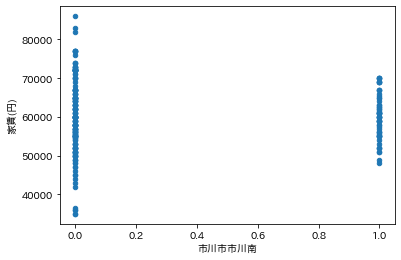

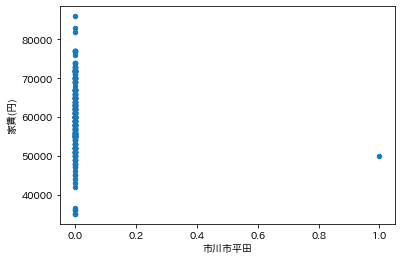

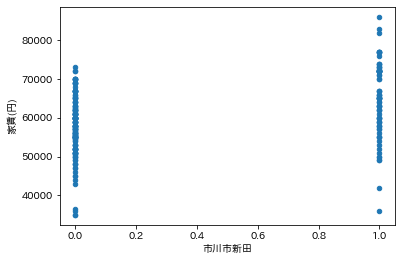

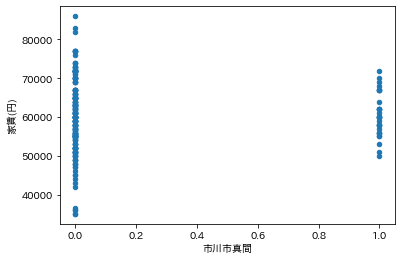

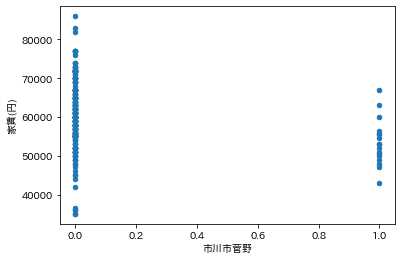

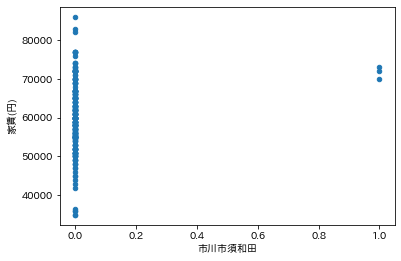

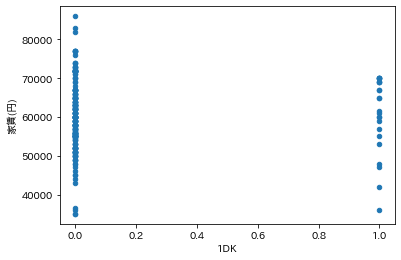

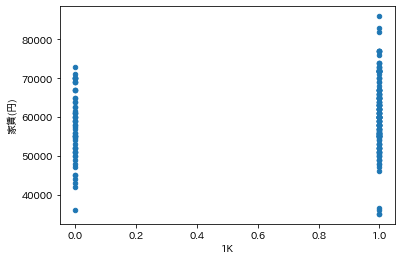

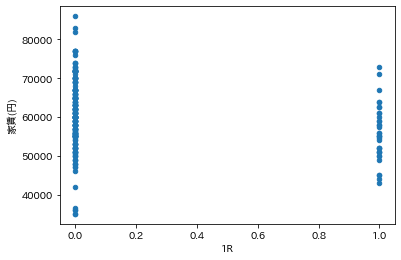

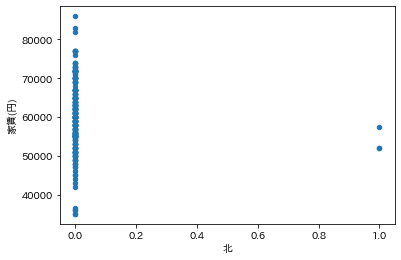

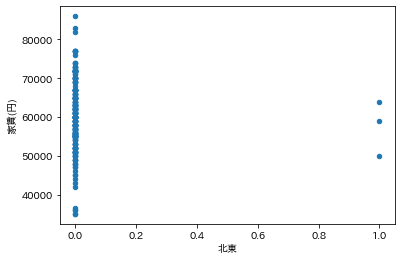

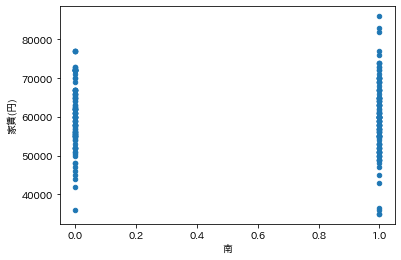

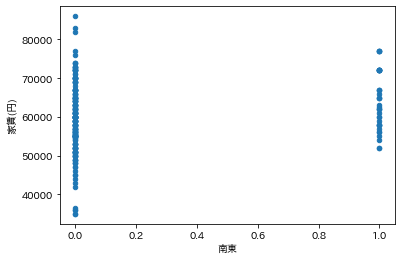

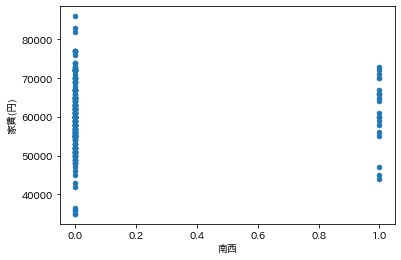

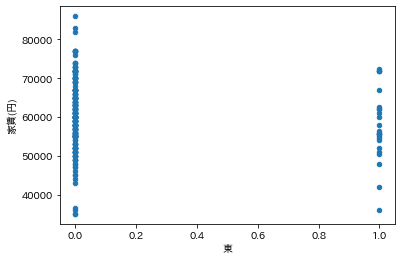

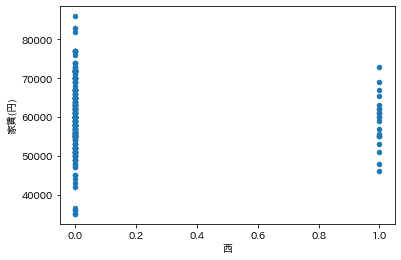

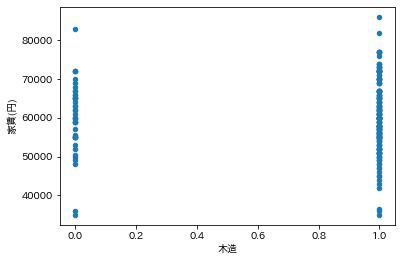

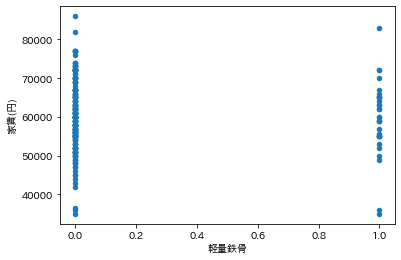

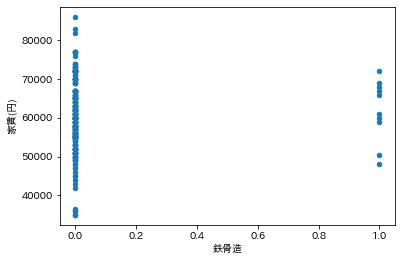

In [104]:
for name in colname:
  train_val.plot(kind='scatter', x=name, y='家賃(円)')

## 問題１０　正解データと各特徴量の相関関係を説明できるように表示してください。

In [105]:
# 相関係数の一覧を出力する関数
def print_corrs(val_corr_abs, t_col=t_col):
  # 特徴量として選択する項目の相関係数に対する閾値
  threshold = {
    '非常に強い相関(0.9以上)':[1.0, 0.9],
    '強い相関(0.7以上)':[0.9, 0.7],
    '相関あり(0.5以上)':[0.7, 0.5],
    '弱い相関(0.3以上)':[0.5, 0.3],
    '相関なし(0.3未満)':[0.3, 0.0]
    }

  print(f'正解データ「{t_col}」に対する各特徴量の相関係数')

  for k in threshold:
    print('---', k, '---')
    for i in val_corr_abs[(threshold[k][0]>val_corr_abs) & (val_corr_abs>=threshold[k][1])].index:
      print(f'{i:8}\t{val_corr_abs[i]:.5f}')
    
    print()

In [106]:
train_val_corr_abs = train_val.corr()[t_col].map(abs).sort_values(ascending=False)
print_corrs(train_val_corr_abs)

正解データ「家賃(円)」に対する各特徴量の相関係数
--- 非常に強い相関(0.9以上) ---

--- 強い相関(0.7以上) ---

--- 相関あり(0.5以上) ---
築年数(年)  	0.56536
面積(㎡)   	0.53704

--- 弱い相関(0.3以上) ---
市川市新田   	0.38155
駅徒歩分    	0.37436

--- 相関なし(0.3未満) ---
市川市市川   	0.29639
市川市菅野   	0.21860
礼金(か月）  	0.21464
敷金(か月)  	0.21030
1R      	0.20847
南東      	0.20531
市川市大洲   	0.18472
1K      	0.15710
市川市須和田  	0.14634
東       	0.10247
北       	0.08401
市川市平田   	0.07677
南       	0.06156
西       	0.04924
南西      	0.04725
鉄骨造     	0.04100
軽量鉄骨    	0.03839
市川市大町   	0.03592
市川市大和田  	0.03462
北東      	0.03450
1DK     	0.01977
木造      	0.01311
市川市真間   	0.01231
市川市市川南  	0.01053



## 問題１１　正解データと特徴量を抽出し、それぞれの先頭５行を表示してください。

In [107]:
t = train_val[[t_col]]
t.head()

,家賃(円)
176,69000
26,70000
74,65000
101,51000
154,72000


In [108]:
# 使用する特徴量の相関係数の閾値
corr_threshold = 0.3  # 弱い相関

# 相関係数が閾値以上のものだけ特徴量として抽出
x = train_val[train_val_corr_abs[train_val_corr_abs>=corr_threshold].index.drop(t_col)]
x.head()

,築年数(年),面積(㎡),市川市新田,駅徒歩分
176,1.0,19.87,0,2.0
26,28.0,31.53,1,8.0
74,12.0,28.92,0,10.0
101,20.0,20.50,0,2.0
154,0.0,20.70,1,2.0


## 問題１２　問題１１で抽出した正解データと特徴量を使用して、訓練データと検証データに分割してください。
### ただし、訓練データと検証データの比率は８：２、乱数シードは０とします。

In [109]:
x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=0)

## 問題１３　線形重回帰モデルを使用して学習さて、検証データで決定係数を求めて表示してください。

In [110]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_val, y_val)

0.5858264078041828

## 問題１４　問題１３で学習したモデルを使用して以下のデータを使用して家賃がいくらになるか予測させてください。
### 予測させるデータは以下の通りです。
#### 敷金：１か月
#### 礼金；１か月
#### 面積：３０㎡
#### 築年数：３年
#### 駅徒歩分：１０分
#### 所在地：市川市新田
#### 間取：１DK
#### 方位：南向き
#### 構造：鉄骨造


In [111]:
# 築年数3, 面積30, 市川市新田1, 駅徒歩分10
test_data = [[3, 30, 1, 10]]
model.predict(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[76317.37614456]])

## 問題１５　特徴量エンジニアリングで訓練データと検証データの決定係数が特徴量エンジニアリングを行う前より良くなるようにしてください。
### ただし、特徴量エンジニアリングの過程が理解できるようにセルを構成してください。

In [112]:
# 標準化学習関数
def learn(x, t):
    x_train, x_val, y_train, y_val = train_test_split(x, t, test_size = 0.2, random_state = 0)
    # 訓練データを標準化
    sc_model_x = StandardScaler()
    sc_model_y = StandardScaler()
    sc_model_x.fit(x_train)
    sc_x_train = sc_model_x.transform(x_train)
    sc_model_y.fit(y_train)
    sc_y_train = sc_model_y.transform(y_train)
    # 学習
    model = LinearRegression()
    model.fit(sc_x_train, sc_y_train)
    #検証データを標準化
    sc_x_val = sc_model_x.transform(x_val)
    sc_y_val = sc_model_y.transform(y_val)
    # 訓練データと検証データの決定係数計算
    train_score = model.score(sc_x_train, sc_y_train)
    val_score = model.score(sc_x_val, sc_y_val)
    return train_score, val_score

In [113]:
# 元のデータを標準化
x_score, t_score = learn(x, t)
print(x_score, t_score)

0.6312926310164637 0.5858264078041829


標準化しただけでは変わらず

所在地が家賃に影響を与えると考えた

In [114]:
# ダミーデータ化する前のデータでテストデータを抽出
tmp0, _ = train_test_split(df0, test_size = 0.2, random_state = 0)
tmp0 = tmp0.drop([out_line1[0], out_line2[0], out_line3[0]], axis=0)
tmp0.head()

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
176,市川市市川南,69000,2,1.0,19.87,1.0,2.0,1K,西,鉄骨造
26,市川市新田,70000,2,2.0,31.53,28.0,8.0,1DK,南,木造
74,市川市大洲,65000,2,1.0,28.92,12.0,10.0,1DK,南東,木造
101,市川市市川,51000,1,1.0,20.50,20.0,2.0,1K,南,木造
154,市川市新田,72000,2,1.0,20.70,0.0,2.0,1K,東,木造


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


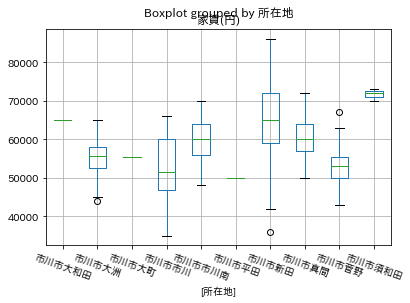

In [115]:
tmp2 = tmp0[['家賃(円)', '所在地']]
tmp2.boxplot(by='所在地', rot=-20)

In [116]:
tmp = pd.concat([tmp0.groupby('所在地').count()['家賃(円)'], tmp0.groupby('所在地').mean()['家賃(円)'], tmp0.groupby('所在地').std()['家賃(円)']],axis=1)
tmp.columns = ['件数', '平均', '標準偏差']
tmp = tmp.sort_values(by='件数', ascending=False)
tmp

,件数,平均,標準偏差
所在地,,,
市川市新田,81,64993.827160,9352.972063
市川市市川南,61,60180.327869,5735.149509
市川市真間,33,60606.060606,5476.879780
市川市大洲,22,55272.727273,5511.302829
市川市市川,20,51775.000000,10084.478694
市川市菅野,17,53441.176471,5947.379551
市川市須和田,3,71666.666667,1527.525232
市川市大和田,1,65000.000000,NaN
市川市大町,1,55500.000000,NaN


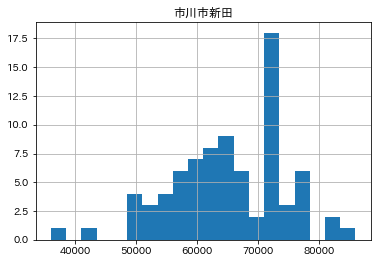

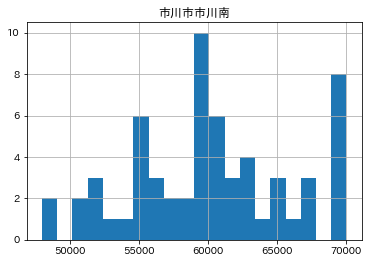

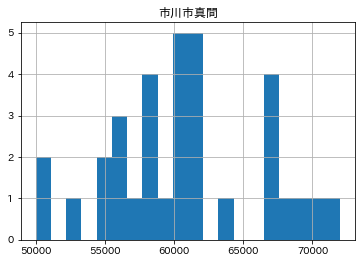

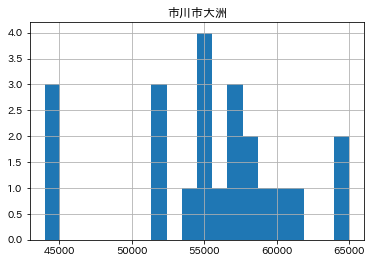

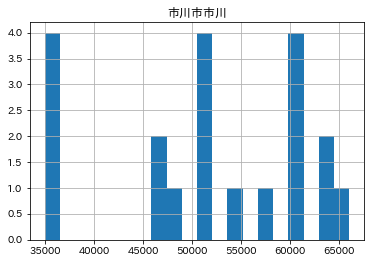

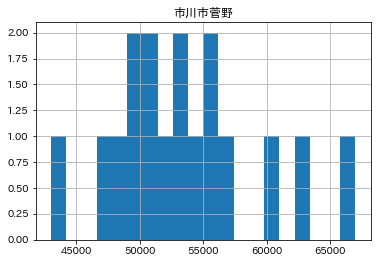

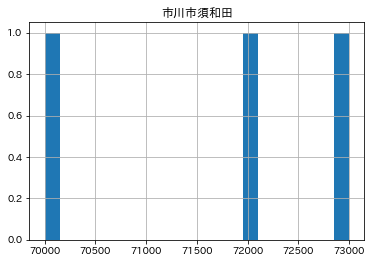

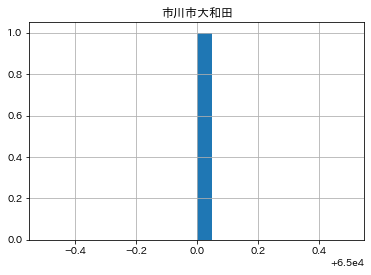

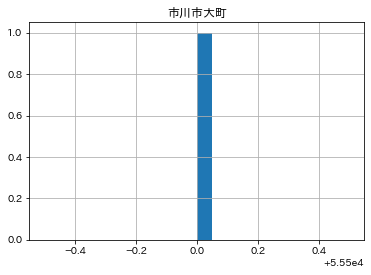

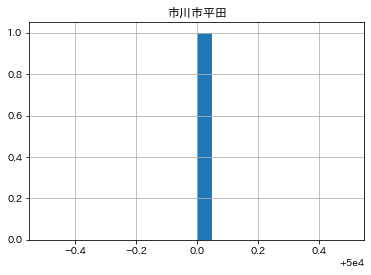

In [117]:
for col in tmp.index:
  tmp3 = tmp2[tmp2['所在地']==col]
  tmp3.columns = [col,'']
  tmp3.hist(bins=20)

決定係数があがる組み合わせを検討<br>

In [118]:
# 件数の少ない所在地は無視
tmp = tmp.drop(['市川市大和田', '市川市大町', '市川市平田'], axis=0)
tmp

,件数,平均,標準偏差
所在地,,,
市川市新田,81,64993.827160,9352.972063
市川市市川南,61,60180.327869,5735.149509
市川市真間,33,60606.060606,5476.879780
市川市大洲,22,55272.727273,5511.302829
市川市市川,20,51775.000000,10084.478694
市川市菅野,17,53441.176471,5947.379551
市川市須和田,3,71666.666667,1527.525232


所在地の全組み合わせを特徴量に加えて、決定係数が最も高くなるパターンを選択<br>
全パターンを試すと計算量が非常に多くなるが今回はそこまで多くない為続行

In [119]:
import itertools, copy

x_col = ['築年数(年)', '面積(㎡)', '駅徒歩分',]

max_score = 0
max_pattern = []

for i in range(len(tmp)):
  for pattern in itertools.combinations(tmp.index, i+1):
    x_tmp_col = copy.copy(x_col)
    x_tmp_col += pattern
    # print(x_tmp_col)
    x_tmp = train_val.loc[:, x_tmp_col]
    x_score, t_score = learn(x_tmp, t)
    if t_score > max_score:
      print(pattern)
      print(t_score)
      max_score = t_score
      max_pattern = pattern


('市川市新田',)
0.5858264078041829
('市川市新田', '市川市真間')
0.5927307791976558
('市川市新田', '市川市市川')
0.6053464658791174
('市川市新田', '市川市須和田')
0.6111704103651614
('市川市新田', '市川市市川南', '市川市市川')
0.6142669756301504
('市川市新田', '市川市真間', '市川市須和田')
0.6217048146380444
('市川市新田', '市川市市川', '市川市須和田')
0.6290715592499236
('市川市新田', '市川市市川南', '市川市市川', '市川市須和田')
0.6373788394249451
('市川市新田', '市川市市川南', '市川市真間', '市川市市川', '市川市須和田')
0.6381746290864808
('市川市新田', '市川市市川南', '市川市大洲', '市川市市川', '市川市須和田')
0.640759737552457


上記組み合わせを特徴量に追加することにする

In [120]:
x_col += max_pattern
x = train_val.loc[:, x_col]
x.head()

,築年数(年),面積(㎡),駅徒歩分,市川市新田,市川市市川南,市川市大洲,市川市市川,市川市須和田
176,1.0,19.87,2.0,0,1,0,0,0
26,28.0,31.53,8.0,1,0,0,0,0
74,12.0,28.92,10.0,0,0,1,0,0
101,20.0,20.50,2.0,0,0,0,1,0
154,0.0,20.70,2.0,1,0,0,0,0


In [121]:
x_score, t_score = learn(x, t)
print(x_score, t_score)

0.6768543210580739 0.640759737552457


面積の累乗を検討

In [122]:
x['面積2'] = x['面積(㎡)']**2
x.head()

,築年数(年),面積(㎡),駅徒歩分,市川市新田,市川市市川南,市川市大洲,市川市市川,市川市須和田,面積2
176,1.0,19.87,2.0,0,1,0,0,0,394.8169
26,28.0,31.53,8.0,1,0,0,0,0,994.1409
74,12.0,28.92,10.0,0,0,1,0,0,836.3664
101,20.0,20.50,2.0,0,0,0,1,0,420.2500
154,0.0,20.70,2.0,1,0,0,0,0,428.4900


In [123]:
x_score, t_score = learn(x, t)
print(x_score, t_score)

0.6811884376590992 0.6471839478992236


採用

築年数の累乗を検討

In [124]:
x['築年数2'] = x['築年数(年)']**2
x.head()

,築年数(年),面積(㎡),駅徒歩分,市川市新田,市川市市川南,市川市大洲,市川市市川,市川市須和田,面積2,築年数2
176,1.0,19.87,2.0,0,1,0,0,0,394.8169,1.0
26,28.0,31.53,8.0,1,0,0,0,0,994.1409,784.0
74,12.0,28.92,10.0,0,0,1,0,0,836.3664,144.0
101,20.0,20.50,2.0,0,0,0,1,0,420.2500,400.0
154,0.0,20.70,2.0,1,0,0,0,0,428.4900,0.0


In [125]:
x_score, t_score = learn(x, t)
print(x_score, t_score)

0.6812016608837077 0.6463171102614317


決定係数が上がらないため不採用

In [126]:
x = x.drop(['築年数2'], axis=1)
x.head()

,築年数(年),面積(㎡),駅徒歩分,市川市新田,市川市市川南,市川市大洲,市川市市川,市川市須和田,面積2
176,1.0,19.87,2.0,0,1,0,0,0,394.8169
26,28.0,31.53,8.0,1,0,0,0,0,994.1409
74,12.0,28.92,10.0,0,0,1,0,0,836.3664
101,20.0,20.50,2.0,0,0,0,1,0,420.2500
154,0.0,20.70,2.0,1,0,0,0,0,428.4900


駅徒歩分の累乗を検討

In [127]:
x['駅徒歩分2'] = x['駅徒歩分']**2
x.head()

,築年数(年),面積(㎡),駅徒歩分,市川市新田,市川市市川南,市川市大洲,市川市市川,市川市須和田,面積2,駅徒歩分2
176,1.0,19.87,2.0,0,1,0,0,0,394.8169,4.0
26,28.0,31.53,8.0,1,0,0,0,0,994.1409,64.0
74,12.0,28.92,10.0,0,0,1,0,0,836.3664,100.0
101,20.0,20.50,2.0,0,0,0,1,0,420.2500,4.0
154,0.0,20.70,2.0,1,0,0,0,0,428.4900,4.0


In [128]:
x_score, t_score = learn(x, t)
print(x_score, t_score)

0.6811938808214844 0.6479490120352928


採用

築年数*駅徒歩分を検討

In [129]:
x['築年数*駅徒歩分'] = x['築年数(年)']*x['駅徒歩分']
x.head()

,築年数(年),面積(㎡),駅徒歩分,市川市新田,市川市市川南,市川市大洲,市川市市川,市川市須和田,面積2,駅徒歩分2,築年数*駅徒歩分
176,1.0,19.87,2.0,0,1,0,0,0,394.8169,4.0,2.0
26,28.0,31.53,8.0,1,0,0,0,0,994.1409,64.0,224.0
74,12.0,28.92,10.0,0,0,1,0,0,836.3664,100.0,120.0
101,20.0,20.50,2.0,0,0,0,1,0,420.2500,4.0,40.0
154,0.0,20.70,2.0,1,0,0,0,0,428.4900,4.0,0.0


In [130]:
x_score, t_score = learn(x, t)
print(x_score, t_score)

0.681423706187174 0.6586012521699576


採用

築年数*面積を検討

In [131]:
x['築年数*面積'] = x['築年数(年)']*x['面積(㎡)']
x.head()

,築年数(年),面積(㎡),駅徒歩分,市川市新田,市川市市川南,市川市大洲,市川市市川,市川市須和田,面積2,駅徒歩分2,築年数*駅徒歩分,築年数*面積
176,1.0,19.87,2.0,0,1,0,0,0,394.8169,4.0,2.0,19.87
26,28.0,31.53,8.0,1,0,0,0,0,994.1409,64.0,224.0,882.84
74,12.0,28.92,10.0,0,0,1,0,0,836.3664,100.0,120.0,347.04
101,20.0,20.50,2.0,0,0,0,1,0,420.2500,4.0,40.0,410.00
154,0.0,20.70,2.0,1,0,0,0,0,428.4900,4.0,0.0,0.00


In [132]:
x_score, t_score = learn(x, t)
print(x_score, t_score)

0.6827339499422036 0.6566837464550661


不採用

In [133]:
x = x.drop(['築年数*面積'], axis=1)
x.head()

,築年数(年),面積(㎡),駅徒歩分,市川市新田,市川市市川南,市川市大洲,市川市市川,市川市須和田,面積2,駅徒歩分2,築年数*駅徒歩分
176,1.0,19.87,2.0,0,1,0,0,0,394.8169,4.0,2.0
26,28.0,31.53,8.0,1,0,0,0,0,994.1409,64.0,224.0
74,12.0,28.92,10.0,0,0,1,0,0,836.3664,100.0,120.0
101,20.0,20.50,2.0,0,0,0,1,0,420.2500,4.0,40.0
154,0.0,20.70,2.0,1,0,0,0,0,428.4900,4.0,0.0


面積*駅徒歩分を検討

In [134]:
x['面積*駅徒歩分'] = x['面積(㎡)']*x['駅徒歩分']
x.head()

,築年数(年),面積(㎡),駅徒歩分,市川市新田,市川市市川南,市川市大洲,市川市市川,市川市須和田,面積2,駅徒歩分2,築年数*駅徒歩分,面積*駅徒歩分
176,1.0,19.87,2.0,0,1,0,0,0,394.8169,4.0,2.0,39.74
26,28.0,31.53,8.0,1,0,0,0,0,994.1409,64.0,224.0,252.24
74,12.0,28.92,10.0,0,0,1,0,0,836.3664,100.0,120.0,289.20
101,20.0,20.50,2.0,0,0,0,1,0,420.2500,4.0,40.0,41.00
154,0.0,20.70,2.0,1,0,0,0,0,428.4900,4.0,0.0,41.40


In [135]:
x_score, t_score = learn(x, t)
print(x_score, t_score)

0.6816579508248437 0.6532410836734148


不採用

In [136]:
x = x.drop(['面積*駅徒歩分'], axis=1)
x.head()

,築年数(年),面積(㎡),駅徒歩分,市川市新田,市川市市川南,市川市大洲,市川市市川,市川市須和田,面積2,駅徒歩分2,築年数*駅徒歩分
176,1.0,19.87,2.0,0,1,0,0,0,394.8169,4.0,2.0
26,28.0,31.53,8.0,1,0,0,0,0,994.1409,64.0,224.0
74,12.0,28.92,10.0,0,0,1,0,0,836.3664,100.0,120.0
101,20.0,20.50,2.0,0,0,0,1,0,420.2500,4.0,40.0
154,0.0,20.70,2.0,1,0,0,0,0,428.4900,4.0,0.0


築年数 *面積 *駅徒歩分を検討

In [137]:
x['築年数*面積*駅徒歩分'] = x['築年数(年)']*x['面積(㎡)']*x['駅徒歩分']
x.head()

,築年数(年),面積(㎡),駅徒歩分,市川市新田,市川市市川南,市川市大洲,市川市市川,市川市須和田,面積2,駅徒歩分2,築年数*駅徒歩分,築年数*面積*駅徒歩分
176,1.0,19.87,2.0,0,1,0,0,0,394.8169,4.0,2.0,39.74
26,28.0,31.53,8.0,1,0,0,0,0,994.1409,64.0,224.0,7062.72
74,12.0,28.92,10.0,0,0,1,0,0,836.3664,100.0,120.0,3470.40
101,20.0,20.50,2.0,0,0,0,1,0,420.2500,4.0,40.0,820.00
154,0.0,20.70,2.0,1,0,0,0,0,428.4900,4.0,0.0,0.00


In [138]:
x_score, t_score = learn(x, t)
print(x_score, t_score)

0.6826366834401516 0.6502426230422086


不採用

In [139]:
x = x.drop(['築年数*面積*駅徒歩分'], axis=1)
x.head()

,築年数(年),面積(㎡),駅徒歩分,市川市新田,市川市市川南,市川市大洲,市川市市川,市川市須和田,面積2,駅徒歩分2,築年数*駅徒歩分
176,1.0,19.87,2.0,0,1,0,0,0,394.8169,4.0,2.0
26,28.0,31.53,8.0,1,0,0,0,0,994.1409,64.0,224.0
74,12.0,28.92,10.0,0,0,1,0,0,836.3664,100.0,120.0
101,20.0,20.50,2.0,0,0,0,1,0,420.2500,4.0,40.0
154,0.0,20.70,2.0,1,0,0,0,0,428.4900,4.0,0.0


最終的な決定係数

In [140]:
x_score, t_score = learn(x, t)
print(x_score, t_score)

0.681423706187174 0.6586012521699576


最終的な相関係数の一覧

In [141]:
corr_abs = pd.concat([x,t], axis=1).corr()[t_col].map(abs).sort_values(ascending=False)
print_corrs(corr_abs)

正解データ「家賃(円)」に対する各特徴量の相関係数
--- 非常に強い相関(0.9以上) ---

--- 強い相関(0.7以上) ---

--- 相関あり(0.5以上) ---
築年数*駅徒歩分	0.60899
築年数(年)  	0.56536
面積(㎡)   	0.53704
面積2     	0.51176

--- 弱い相関(0.3以上) ---
市川市新田   	0.38155
駅徒歩分    	0.37436
駅徒歩分2   	0.35921

--- 相関なし(0.3未満) ---
市川市市川   	0.29639
市川市大洲   	0.18472
市川市須和田  	0.14634
市川市市川南  	0.01053



## 問題１６　チューニング結果を受けて、データの標準化後再学習をしてください。

In [142]:
sc_model_x = StandardScaler()
sc_model_x.fit(x)
sc_x = sc_model_x.transform(x)

sc_model_y = StandardScaler()
sc_model_y.fit(t)
sc_y = sc_model_y.transform(t)

model = LinearRegression()
model.fit(sc_x, sc_y)

model.score(sc_x, sc_y)

0.6873002803624243

## 問題１７　テストデータを使用してモデルを評価してください。
## ただし、決定係数の値が 0.65 以上となるようにしてください。

築年数(年)	面積(㎡)	駅徒歩分	市川市新田	市川市市川南	市川市大洲	市川市市川	市川市須和田	面積2	駅徒歩分2	築年数*駅徒歩分

In [143]:
test.head()

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,市川市大和田,市川市大洲,市川市大町,市川市市川,市川市市川南,市川市平田,市川市新田,市川市真間,市川市菅野,市川市須和田,1DK,1K,1R,北,北東,南,南東,南西,東,西,木造,軽量鉄骨,鉄骨造
66,64500,2,1.0,18.04,4.0,8.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
156,60000,2,1.0,20.00,16.0,4.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
247,61000,1,1.0,18.00,19.0,10.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
267,58000,2,1.0,20.03,14.0,15.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
145,50000,1,2.0,20.66,22.0,8.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [144]:
test2 = test.fillna(train_val.mean())
x_test = test2.loc[:, x_col]
y_test = test2[[t_col]]

x_test['面積2'] = x_test['面積(㎡)']**2
x_test['駅徒歩分2'] = x_test['駅徒歩分']**2
x_test['築年数*駅徒歩分'] = x_test['築年数(年)']*x_test['駅徒歩分']

sc_x_test = sc_model_x.transform(x_test)
sc_y_test = sc_model_y.transform(y_test)

x_test.head()

,築年数(年),面積(㎡),駅徒歩分,市川市新田,市川市市川南,市川市大洲,市川市市川,市川市須和田,面積2,駅徒歩分2,築年数*駅徒歩分
66,4.0,18.04,8.0,0,1,0,0,0,325.4416,64.0,32.0
156,16.0,20.00,4.0,0,0,0,1,0,400.0000,16.0,64.0
247,19.0,18.00,10.0,0,0,1,0,0,324.0000,100.0,190.0
267,14.0,20.03,15.0,0,0,0,0,0,401.2009,225.0,210.0
145,22.0,20.66,8.0,0,0,0,1,0,426.8356,64.0,176.0


In [145]:
model.score(sc_x_test, sc_y_test)

0.7228160942059744

## 問題１８　モデルとStandardScalerオブジェクトを保存してください。
### ただし、モデルは house_rent.pkl、StandardScalerオブジェクトは house_rent_scx と house_rent_scy とします。

In [146]:
with open('house_rent.pkl', 'wb') as f:
  pickle.dump(model, f)
with open('house_rent_scx.pkl', 'wb') as f:
  pickle.dump(sc_model_x, f)
with open('house_rent_scy.pkl', 'wb') as f:
  pickle.dump(sc_model_y, f)

再度予測してみる

In [147]:
# 築年数(年)3	面積(㎡)30	駅徒歩分10	市川市新田1	市川市市川南0	市川市大洲0	市川市市川0	市川市須和田0	
test_data = [[3, 30, 10, 1, 0, 0, 0, 0, 30**2, 10**2, 3*10]]
sc_model_y.inverse_transform(model.predict(sc_model_x.transform(test_data)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[73767.15054887]])